<a href="https://colab.research.google.com/github/suhail1796/Retail-Sales-Prediction/blob/main/Capstone_Project_2_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

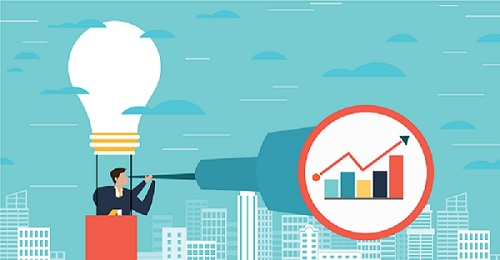

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b><u> Step 1 : Loading the Data Set</u></b>

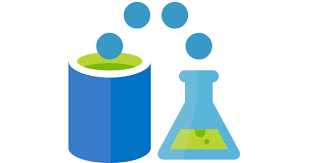

**Importing the Libraries**

In [ ]:
#For Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

#Handle table-like data and matrices
import numpy as np
import pandas as pd
import math

#visualisation
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Machine Learning Algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



**Importing Our Dataset**

In [ ]:
#store_data - Historical data including Sales

sales_data = pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv',parse_dates = True, index_col = 'Date')

#store_data - Supplemental information about the stores

store_data = pd.read_csv('/content/drive/MyDrive/Copy of store.csv') 

In [ ]:
# Displaying first and last 5 rows of our data set

sales_data.head().append(sales_data.tail())

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1


In [ ]:
# Displaying first and last 5 rows of our data set

store_data.head().append(store_data.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# Checking the shape of sales_data

shape = list(sales_data.shape)
print('Number of Rows in sales_data    :',shape[0])
print('Number of Columns in sales_data :',shape[1])

Number of Rows in sales_data    : 1017209
Number of Columns in sales_data : 8


In [ ]:
# Checking the shape of store_data

shape = list(store_data.shape)
print('Number of Rows in sales_data    :',shape[0])
print('Number of Columns in sales_data :',shape[1])

Number of Rows in sales_data    : 1115
Number of Columns in sales_data : 10


### <b><u> Step 2 : Data Cleaning and Preparation</u></b>

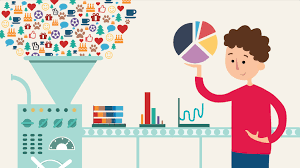

**Dealing with Missing Values**

In [ ]:
#Counting missing values in sales_data

print("sales_data:\n", sales_data.isnull().sum())

sales_data:
 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


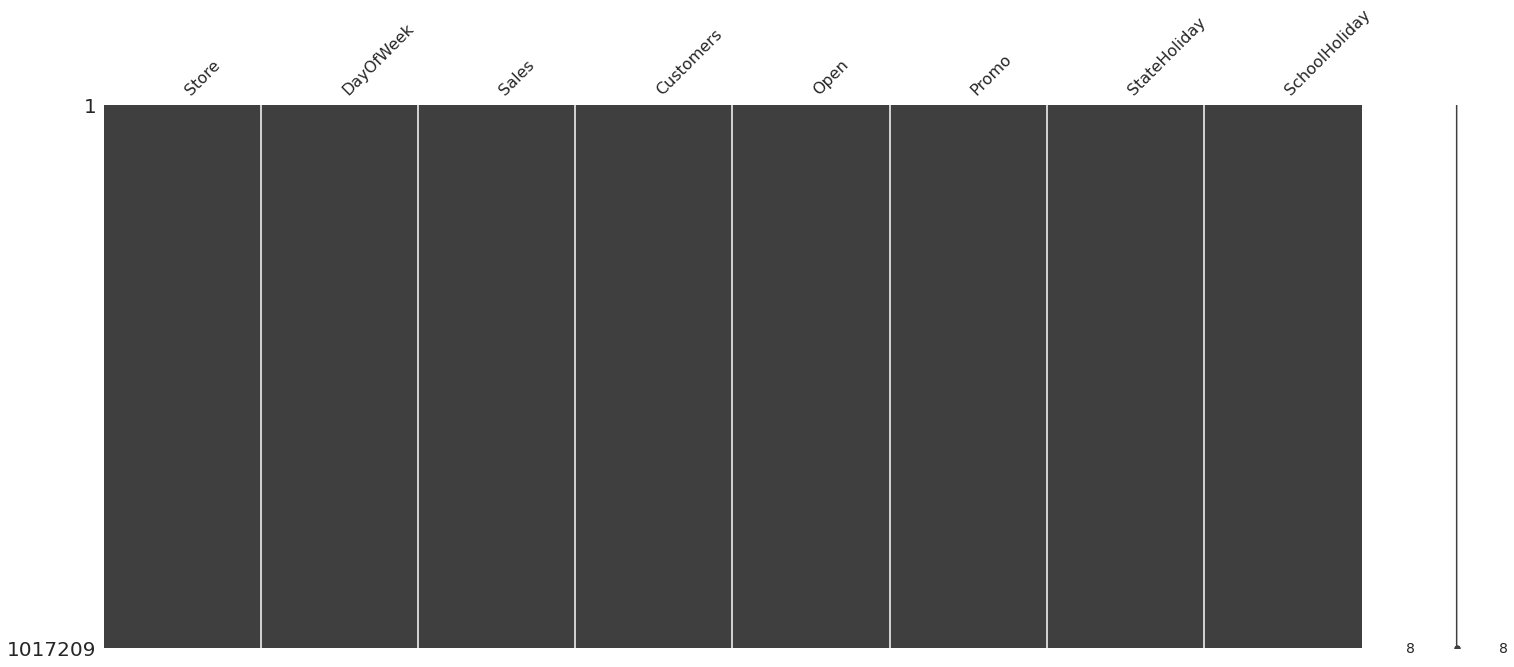

In [ ]:
# Visualizing the missing values in sales_data

msno.matrix(sales_data)

In [ ]:
#Count missing values in store_data

print("store_data:\n",store_data.isnull().sum())

store_data:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


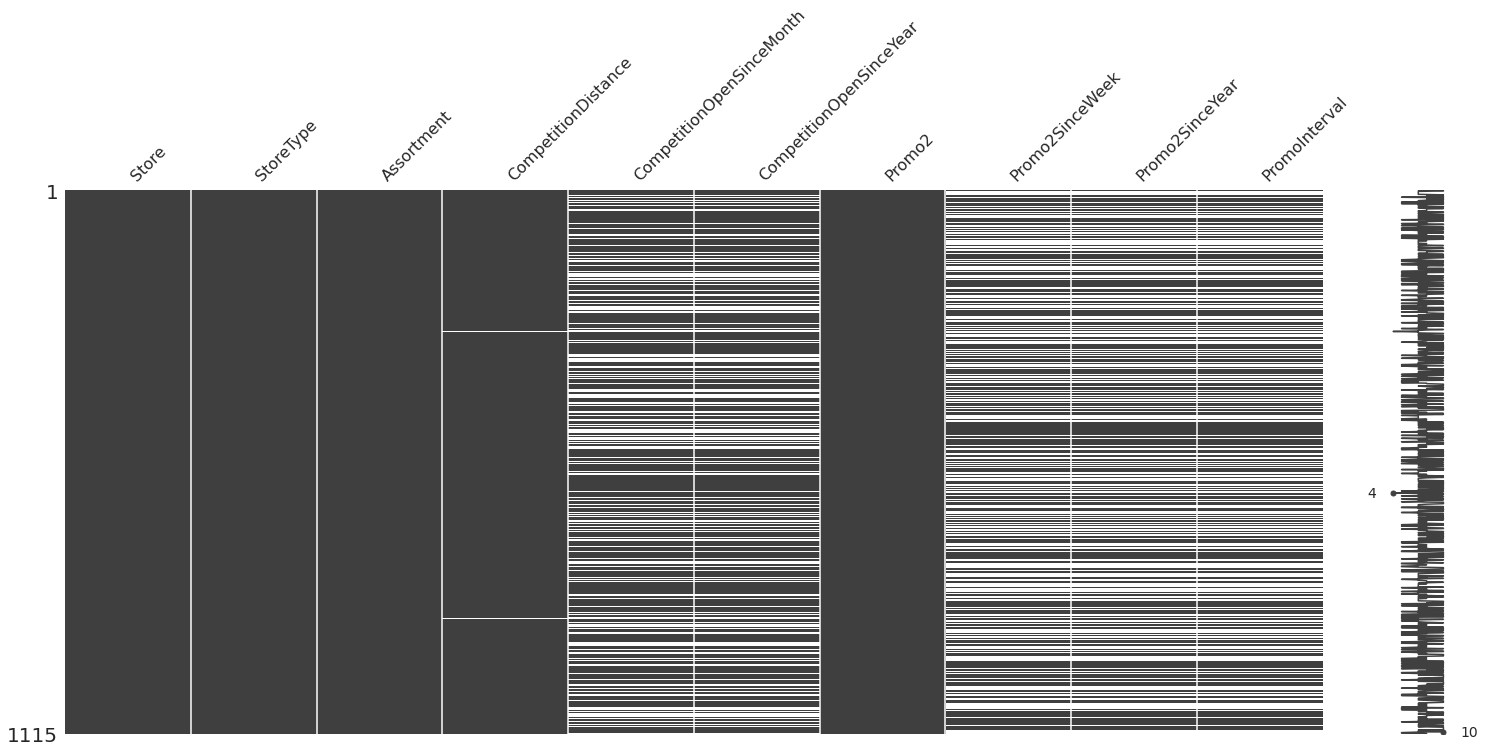

In [ ]:
# Visualizing the missing values in store_data

msno.matrix(store_data)

*we can see that some features have a high percentage of missing value in store_data and they won't be accurate as indicators, so we will remove features with more than 30% missing values.* 

In [ ]:
# Dropping the features in store_data which are not signifcant for analysis

store_data = store_data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                              'Promo2SinceYear', 'PromoInterval'], axis=1)

In [ ]:
# replacing the missing values in 'CompetitionDistance' column with median for store_data

store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(), inplace=True)

In [ ]:
# Again checking for missing values for store_data

print("store_data:\n\n",store_data.isnull().sum())

store_data:

 Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64


*Now we have removed all the missing values from store_data*

In [ ]:
# Extracting the Days, Month, day and week of year from "Date"

sales_data.index = pd.to_datetime(sales_data.index)
sales_data["Year"]=sales_data.index.year
sales_data["Month"]=sales_data.index.month
sales_data["Day"]=sales_data.index.day
sales_data["WeekOfYear"]=sales_data.index.week

# Dropping index column
sales_data.reset_index(drop=True, inplace=True)

sales_data.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,5263,555,1,1,0,1,2015,7,31,31
1,2,5,6064,625,1,1,0,1,2015,7,31,31
2,3,5,8314,821,1,1,0,1,2015,7,31,31
3,4,5,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,4822,559,1,1,0,1,2015,7,31,31


In [ ]:
# Merging sales_data and store_data
df = pd.merge(sales_data, store_data)
df.head().append(df.tail())

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,1,4,5020,546,1,1,0,1,2015,7,30,31,c,a,1270.0,0
2,1,3,4782,523,1,1,0,1,2015,7,29,31,c,a,1270.0,0
3,1,2,5011,560,1,1,0,1,2015,7,28,31,c,a,1270.0,0
4,1,1,6102,612,1,1,0,1,2015,7,27,31,c,a,1270.0,0
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,d,c,5350.0,1
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,d,c,5350.0,1
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,d,c,5350.0,1
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,1,d,c,5350.0,1
1017208,1115,2,0,0,0,0,a,1,2013,1,1,1,d,c,5350.0,1


In [ ]:
# Dropping features of data set which might cause Bias

# When stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

# Checking the data where stores are opened with zero sales
print("Number of stores with zero sales:",df[df.Sales == 0].shape[0])

# Removing the rows where stores are having zero sales
df = df[df.Sales != 0]

# Displaying first 5 rows
df.head()


Number of stores with zero sales: 54


,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0
1,1,4,5020,546,1,0,1,2015,7,30,31,c,a,1270.0,0
2,1,3,4782,523,1,0,1,2015,7,29,31,c,a,1270.0,0
3,1,2,5011,560,1,0,1,2015,7,28,31,c,a,1270.0,0
4,1,1,6102,612,1,0,1,2015,7,27,31,c,a,1270.0,0


In [ ]:
# Displaying last 5 rows
df.tail()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
1017202,1115,1,6905,471,1,0,1,2013,1,7,2,d,c,5350.0,1
1017204,1115,6,4771,339,0,0,1,2013,1,5,1,d,c,5350.0,1
1017205,1115,5,4540,326,0,0,1,2013,1,4,1,d,c,5350.0,1
1017206,1115,4,4297,300,0,0,1,2013,1,3,1,d,c,5350.0,1
1017207,1115,3,3697,305,0,0,1,2013,1,2,1,d,c,5350.0,1


In [ ]:
# Checking the shape of data set
df.shape

(844338, 15)

In [ ]:
# Checking statistical summary
df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946,5450.044852,0.498670
std,321.730861,1.723712,3103.815515,401.194153,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931,7801.082007,0.499999
min,1.000000,1.000000,46.000000,8.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000,20.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000,710.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000,2325.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000,6880.000000,1.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000,75860.000000,1.000000


**Outlier Detection**

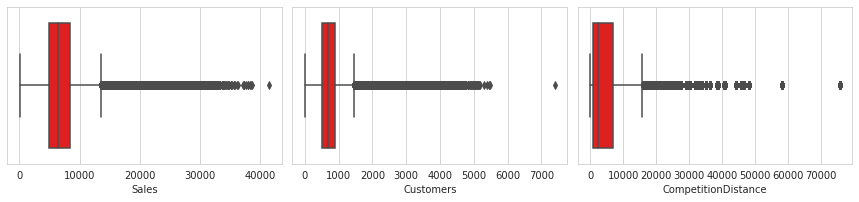

In [ ]:
# Plotting Box Plot for Outliers
outliers = ['Sales', 'Customers', 'CompetitionDistance']
n = 1
plt.figure(figsize=(16,8))
for i in outliers:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[i], color= 'Red')
  plt.tight_layout()
plt.show()

**IQR Method to Remove the Outliers**

In [ ]:
# Lower and Upper Limit for sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower Limit for Sales=",lower_limit)
print("Upper Limit for Sales",upper_limit)

Lower Limit for Sales= -392.5
Upper Limit for Sales 13611.5


In [ ]:
# Lower and Upper Limit for Customer
Q1 = df['Customers'].quantile(0.25)
Q3 = df['Customers'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower Limit for Customers=",lower_limit)
print("Upper Limit for Customers=",upper_limit)

Lower Limit for Customers= -42.0
Upper Limit for Customers= 1454.0


In [ ]:
# Lower and Upper Limit for Competition Distance
Q1 = df['CompetitionDistance'].quantile(0.25)
Q3 = df['CompetitionDistance'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("Lower Limit for Competition Distance=",lower_limit)
print("Upper Limit for Competition Distance=",upper_limit)

Lower Limit for Competition Distance= -8545.0
Upper Limit for Competition Distance= 16135.0


In [ ]:
# Dropping Outliers
df.drop(df[(df.Sales>13611) | (df.Sales<0)].index,inplace=True)
df.drop(df[(df.Customers>1454) | (df.Customers<0)].index,inplace=True)
df.drop(df[(df.CompetitionDistance>16135) | (df.CompetitionDistance<0)].index,inplace=True)

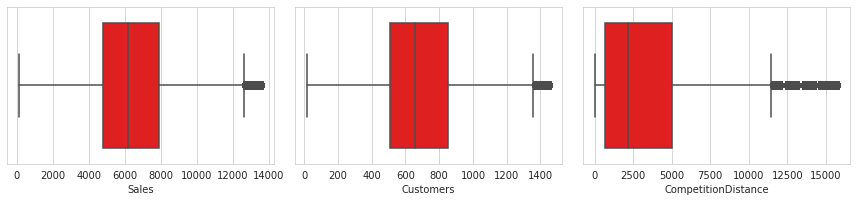

In [ ]:
# Plotting Box Plot for Outliers
out = ['Sales', 'Customers','CompetitionDistance']
n = 1
plt.figure(figsize=(16,8))
for i in out:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[i], color= 'Red')
  plt.tight_layout()
plt.show()

*Now we have removed the outliers from our data set*

In [ ]:
# Handling Categorical Data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713769 entries, 0 to 1017207
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                713769 non-null  int64  
 1   DayOfWeek            713769 non-null  int64  
 2   Sales                713769 non-null  int64  
 3   Customers            713769 non-null  int64  
 4   Promo                713769 non-null  int64  
 5   StateHoliday         713769 non-null  object 
 6   SchoolHoliday        713769 non-null  int64  
 7   Year                 713769 non-null  int64  
 8   Month                713769 non-null  int64  
 9   Day                  713769 non-null  int64  
 10  WeekOfYear           713769 non-null  int64  
 11  StoreType            713769 non-null  object 
 12  Assortment           713769 non-null  object 
 13  CompetitionDistance  713769 non-null  float64
 14  Promo2               713769 non-null  int64  
dtypes: float64(1), i

In [ ]:
# Checking unique values in features with nominal data type
 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [ ]:
'''
'StateHoliday' column indicates a state holiday where
a = public holiday,
b = Easter holiday,
c = Christmas,
0 = None 
'''
# converting  number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

# Mapping Holiday as 0 - not a state holiday; 1- is on a state holiday
df['StateHoliday'] = df.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

set(df.StateHoliday)

{0, 1}

**Adding the Features**

In [ ]:
# Making a Copy of the existing dataset
df1 = df.copy()

In [ ]:
# Calculating the average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()
sales.head()

,Year,Month,Store,AvgSales
0,2013,1,1,4939.653846
1,2013,1,2,4429.653846
2,2013,1,3,6371.269231
3,2013,1,4,8676.227273
4,2013,1,6,5856.346154


In [ ]:
# Adding sales_key column 
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [ ]:
# Dropping the extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)

# Merging sales with df1
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

In [ ]:
#Creating a variable that calculates Monthly average number of customers for each store.
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [ ]:
# Adding cust_key in df1 and cust
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [ ]:
# Dropping the original feature Customers
df1 = df1.drop('Customers', axis=1)

In [ ]:
# Dropping the extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [ ]:
# Merging df1 and cust
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

In [ ]:
# Drpping extra columns
df1 = df1.drop(['cust_key','sales_key','Store'], axis=1)

In [ ]:
# Displaying first five rows
df1.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,4,5020,1,0,1,2015,7,30,31,c,a,1270.0,0,4491.333333,519.407407
2,3,4782,1,0,1,2015,7,29,31,c,a,1270.0,0,4491.333333,519.407407
3,2,5011,1,0,1,2015,7,28,31,c,a,1270.0,0,4491.333333,519.407407
4,1,6102,1,0,1,2015,7,27,31,c,a,1270.0,0,4491.333333,519.407407


### <b><u> Step 3 : Exploratory Data Analysis</u></b>

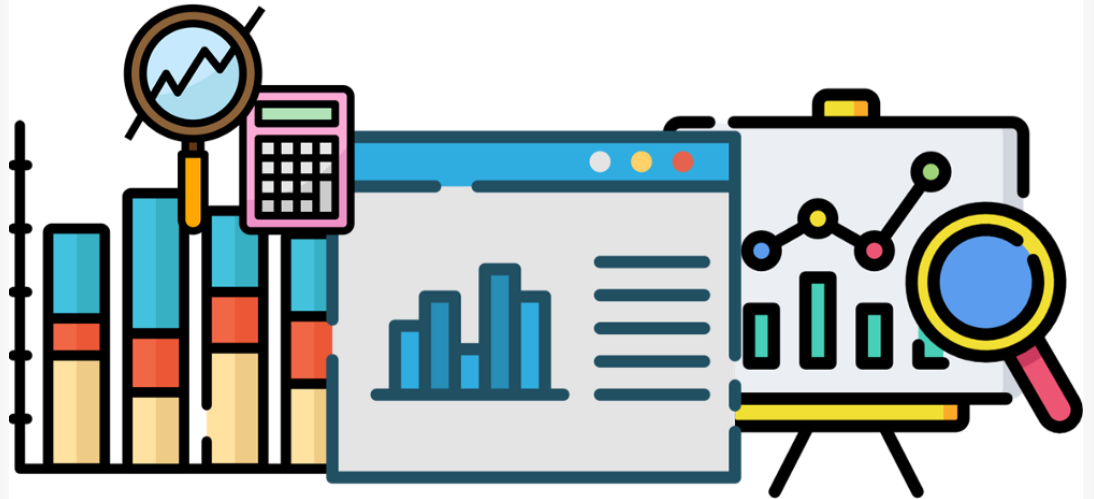

In [ ]:
# Copying data set 
dfv = df.copy()

**Sales Distribution**

Text(0.5, 1.0, 'Sales Distribution')

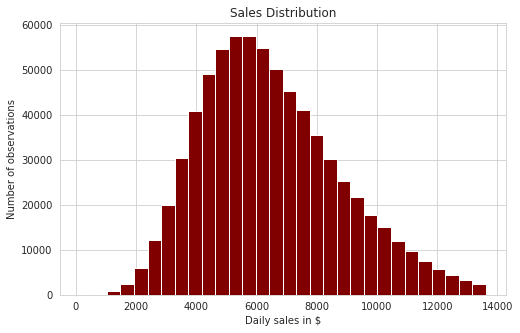

In [ ]:
# Sales Distribution

plt.figure(figsize=(8,5))
plt.hist(x=dfv.Sales, bins=30,color = "maroon")
plt.ylabel('Number of observations')
plt.xlabel('Daily sales in $')
plt.title('Sales Distribution')

*The Sales distribution lived
up to the expectation with
no irregularities.
It seems to be a perfect
gaussian distribution with
small positive skewness.*

**Customer Distribution**

Text(0.5, 1.0, 'Customer Distribution')

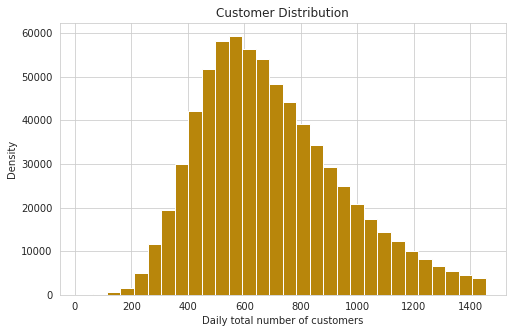

In [ ]:
# Customer Distribution

plt.figure(figsize=(8,5))
plt.hist(x=dfv.Customers , bins=30,color = "darkgoldenrod")
plt.ylabel('Density')
plt.xlabel('Daily total number of customers')
plt.title('Customer Distribution')

**Sales of Store Over the Week**

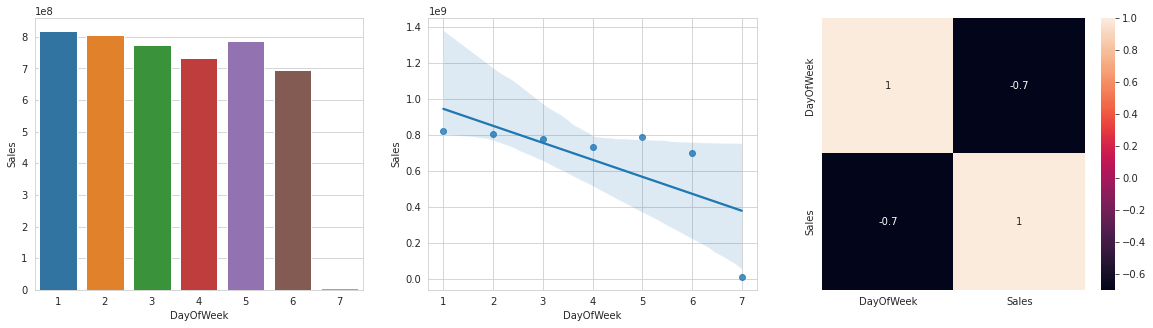

In [ ]:
# Sale of Store Over the Week

plt.figure(figsize=(20,5))
aux1 = dfv[['DayOfWeek','Sales']].groupby('DayOfWeek').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'DayOfWeek',y = 'Sales', data = aux1)

plt.subplot(1,3,2)
sns.regplot(x = 'DayOfWeek',y = 'Sales', data = aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

*Sales of store is dropping on weekends, otherwise sales is good on working days.*

**Sales of Store Over the Month**

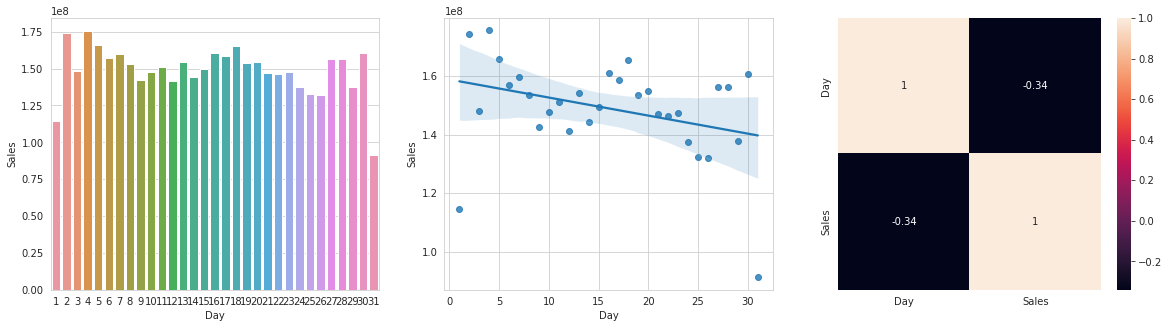

In [ ]:
# Sales of Store Over the Month

plt.figure(figsize=(20,5))
aux1 = dfv[['Day','Sales']].groupby('Day').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'Day',y = 'Sales', data = aux1)

plt.subplot(1,3,2)
sns.regplot(x = 'Day',y = 'Sales', data = aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

*Sales of store is good in first half of the month and it is dropping on second half of the month.*

**Sales of Store After 10th of Each Month**

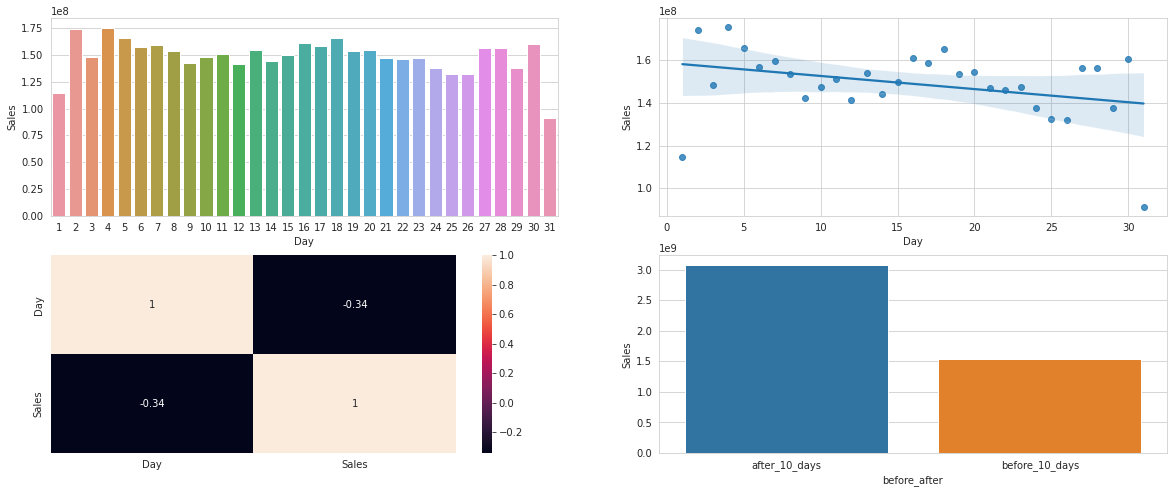

In [ ]:
# sale of store after the 10th of each month
plt.figure(figsize=(20,8))
aux1 = dfv[['Day','Sales']].groupby('Day').sum().reset_index()

plt.subplot(2,2,1)
sns.barplot(x = 'Day',y = 'Sales', data = aux1)

plt.subplot(2,2,2)
sns.regplot(x = 'Day',y = 'Sales', data = aux1)

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

plt.subplot(2,2,4)
aux1['before_after'] = aux1['Day'].apply(lambda x:'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after','Sales']].groupby('before_after').sum().reset_index()
sns.barplot(x = 'before_after', y = 'Sales', data = aux2)

*Sales of store is good in first 10 days of month, and it is decreased in second half of month.*

**Sales Over the Year**

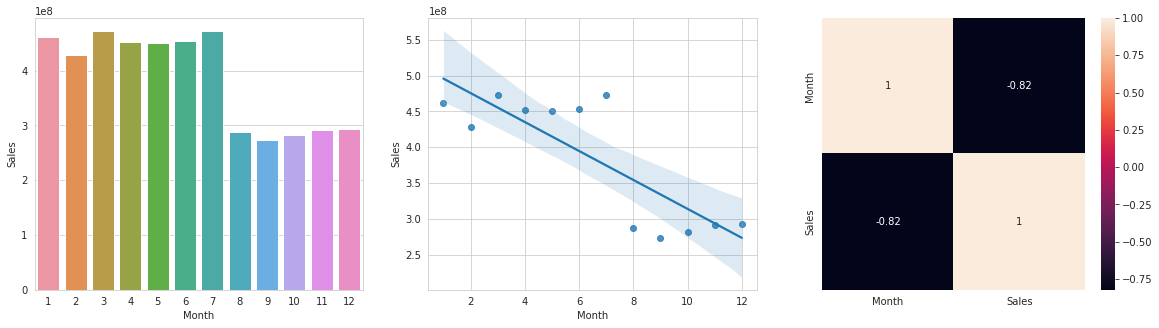

In [ ]:
# Sale of store over the year
plt.figure(figsize=(20,5))
aux1 = dfv[['Month','Sales']].groupby('Month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'Month',y = 'Sales', data = aux1)

plt.subplot(1,3,2)
sns.regplot(x = 'Month',y = 'Sales', data = aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

*Sales performance is good in first half of each year but it is decreased in second half of the year.*

**Sales Performance in Last 3 Years**

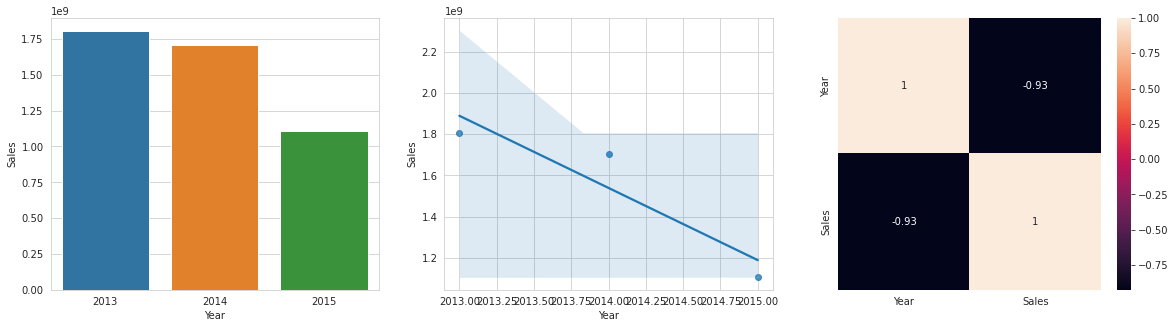

In [ ]:
# Sale of Store in 3 years
plt.figure(figsize=(20,5))
aux1 = dfv[['Year','Sales']].groupby('Year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'Year',y = 'Sales', data = aux1)

plt.subplot(1,3,2)
sns.regplot(x = 'Year',y = 'Sales', data = aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

*Sales performance was good in year 2013 but it is decreasing each year significantly*

**Sales for Different Types of Stores**

Text(0.5, 1.0, 'Types of Stores')

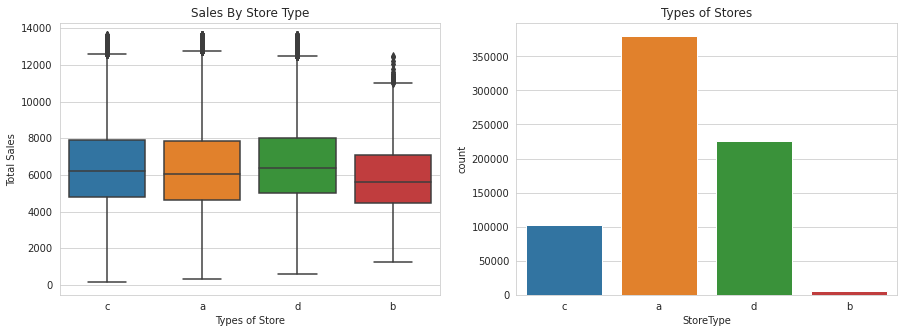

In [ ]:
# Sales by store type

# StoreType - differentiates between 4 different store models: a, b, c, d
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=dfv.StoreType, y=dfv.Sales, data=dfv)
plt.xlabel('Types of Store')
plt.ylabel('Total Sales')
plt.title('Sales By Store Type')   
plt.subplot(1,2,2)
#Let's check number of different types of stores
sns.countplot(dfv.StoreType)
plt.title('Types of Stores')

*Store type B has higher sales as compared to other types of stores,even though number of type B stores are very less as compared to others*

**Sales for Different Types of Assortment**

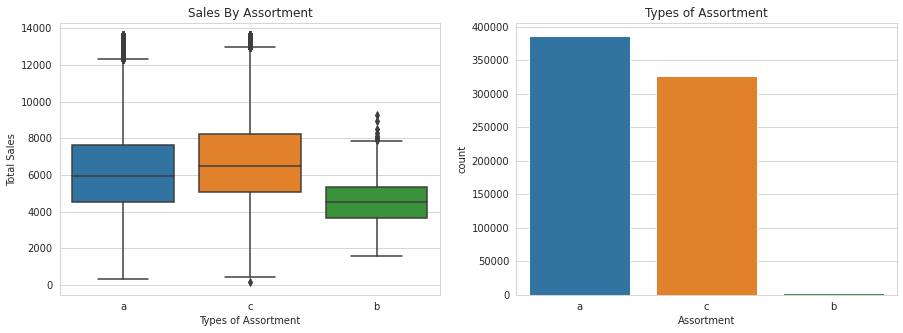

In [ ]:
# Sales by Assortment
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
sns.boxplot(x=dfv.Assortment, y=dfv.Sales, data=dfv) 
plt.ylabel('Total Sales')
plt.xlabel('Types of Assortment') 
plt.title('Sales By Assortment')
# Types of assortment
plt.subplot(1,2,2)
plt.title('Types of Assortment')
sns.countplot(dfv['Assortment'])

*Assortment type B has higher sales as compared to the other types of assortment.*

**Sales Over the Months for different types of Stores & Assortment.**

<Figure size 576x360 with 0 Axes>

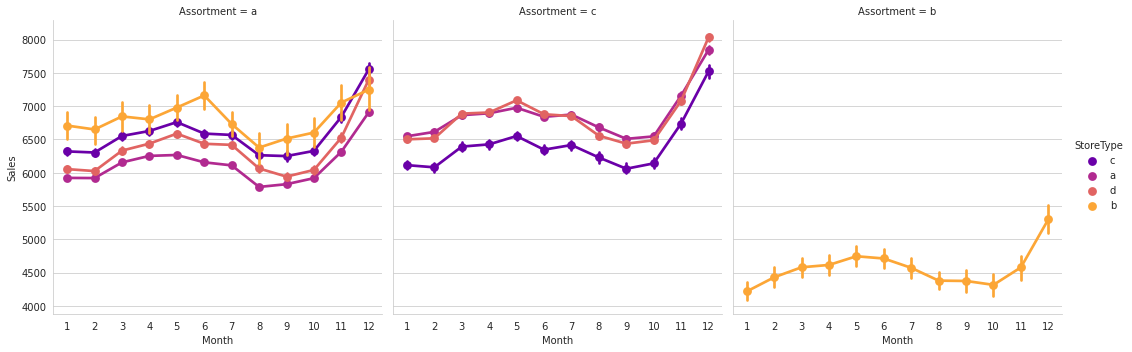

In [ ]:
# Sales over the months for different types of store & assortment
plt.figure(figsize=(8,5))
sns.factorplot(data = dfv, x = 'Month', y = "Sales", col = 'Assortment',palette = 'plasma',hue = 'StoreType')

*Store type B has higher sales over the months in year. It has performed well in all types of Assortment.*

**Impact of School Holidays on Sales**

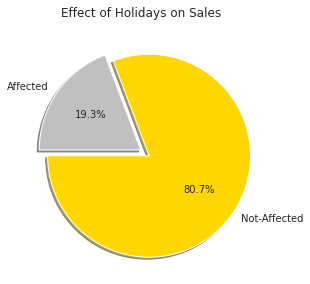

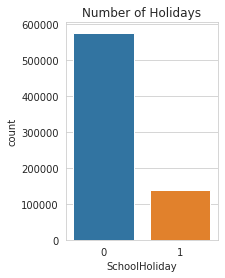

In [ ]:
# Sales affected by school holiday or not ?
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Effect of Holidays on Sales")
plt.plot()
fig=plt.gcf()
plt.show()
plt.subplot(1,2,2)
# Lets check the number of holidays
plt.title('Number of Holidays')
plt.xlabel('School Holidays')
a = dfv[dfv['SchoolHoliday'] != 'regular_day']
sns.countplot(a['SchoolHoliday'])


*Sales is comparitavely lower on school holidays.* 

**Impact of Promotions on Sales**

Text(0.5, 20.80000000000002, 'Week Days')

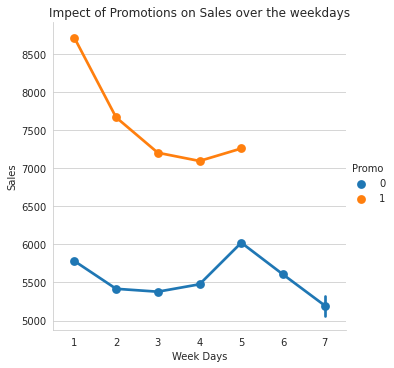

In [ ]:
# Impact of promotion on sales over days of  week
sns.factorplot(data = dfv, x ='DayOfWeek', y = "Sales",hue='Promo' ,sharex=False)
plt.title('Impect of Promotions on Sales over the weekdays')
plt.xlabel('Week Days')

*Sales is increased on each day in week with promotions*

Text(0.5, 20.80000000000002, 'Months')

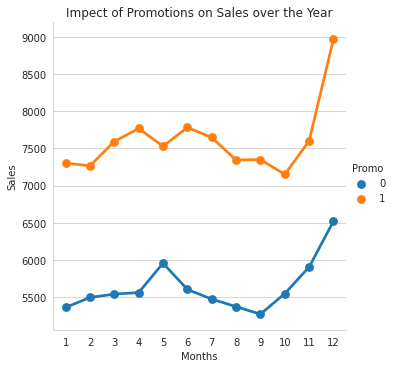

In [ ]:
# Impact of promotion on sales over the year
sns.factorplot(data = dfv, x ="Month", y = "Sales",hue='Promo' ,sharex=False)
plt.title('Impect of Promotions on Sales over the Year')
plt.xlabel('Months')

*Sales is increased in each month after doing the promotion*

Text(0.5, 20.80000000000002, 'Years')

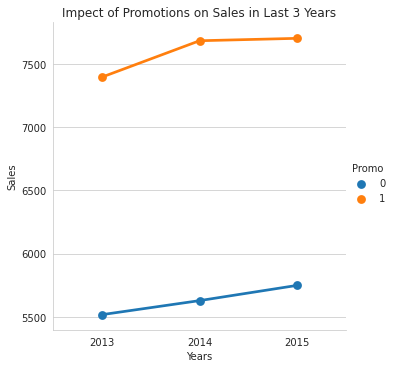

In [ ]:
# Impact of promotion on sales in last 3 Years
sns.factorplot(data = dfv, x ="Year", y = "Sales",hue='Promo' ,sharex=False)
plt.title('Impect of Promotions on Sales in Last 3 Years')
plt.xlabel('Years')

*Approximately 40% sales is increased annually with the help of promotions*

**Impact of Competition Distance on Sales**

Text(0.5, 1.0, 'Relation between Sales and Competition Distance')

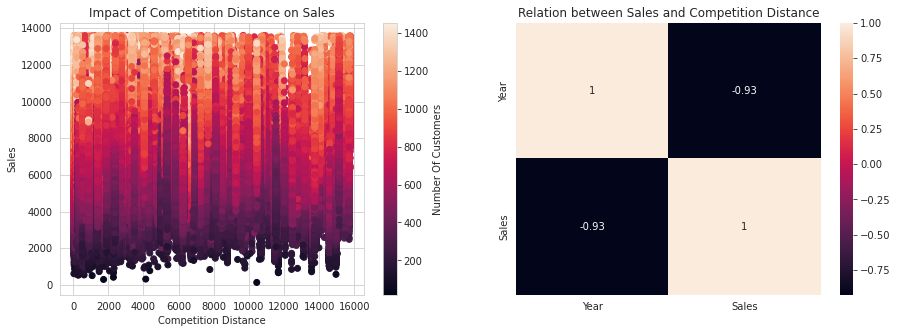

In [ ]:
# Effect of Competition Distance on Sales
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x=dfv.CompetitionDistance, y=dfv.Sales , c=dfv.Customers)
plt.ylabel('Sales')
plt.xlabel('Competition Distance')
plt.title('Impact of Competition Distance on Sales')
cbr= plt.colorbar()
cbr.set_label('Number Of Customers')    
plt.subplot(1,2,2)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);
plt.title('Relation between Sales and Competition Distance')


*At lower competition distance sales is higher because most of the competitors are located where customer demand is high.*

In [ ]:
# Converting categorial features Assortment and StoreType  
dfv['Assortment']=dfv['Assortment'].astype('category').cat.codes
dfv['StoreType']=dfv['StoreType'].astype('category').cat.codes

# Adding new feature SalesperCustomer to get better correlation with StoreType and Assortment
dfv['SalesperCustomer']=dfv['Sales']/dfv['Customers']
corr = dfv.corr()

**Identifying Correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

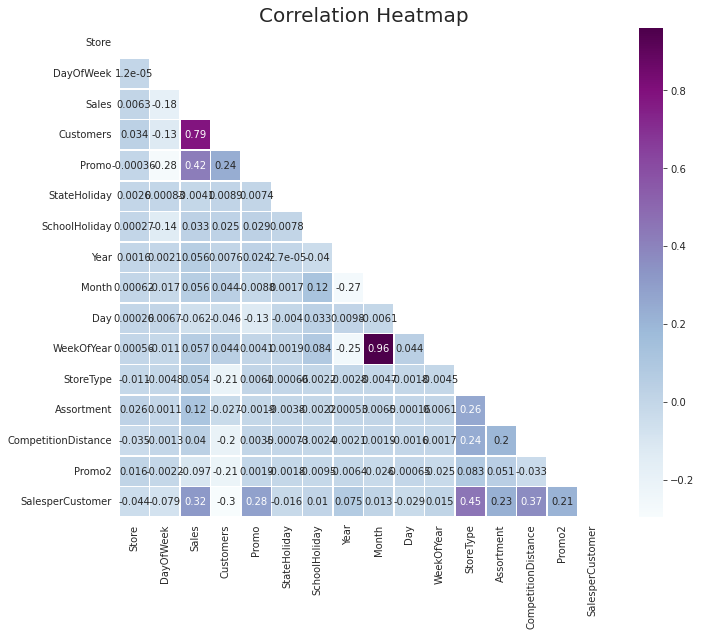

In [ ]:
# Plotting correlation heatmap 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask, annot= True,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

### <b><u> Step 4 : Model Implementation</u></b>

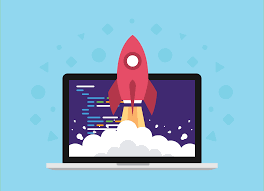

In [ ]:
# splitting the features and labels
X = df.drop('Sales', axis=1)
y = df.Sales

In [ ]:
# Getting dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [ ]:
# Checking first five rows
xd.head()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,555,1,0,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,1,4,546,1,0,1,2015,7,30,31,1270.0,0,0,0,1,0,1,0,0
2,1,3,523,1,0,1,2015,7,29,31,1270.0,0,0,0,1,0,1,0,0
3,1,2,560,1,0,1,2015,7,28,31,1270.0,0,0,0,1,0,1,0,0
4,1,1,612,1,0,1,2015,7,27,31,1270.0,0,0,0,1,0,1,0,0


In [ ]:
# split training and test datasets
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.25, random_state=1)

In [ ]:
# Importing XGBoost
import xgboost
from xgboost import XGBRegressor

In [ ]:
# Implementing Models to Training and Testing Data Set
models = {
    LinearRegression():        " Linear Regression",
    Lasso():                   " Lasso Regression",
    ElasticNet():              " Elastic Net",
    XGBRegressor():            " XG Boost Regressor"}

for model in models.keys():
    model.fit(xd_train, yd_train)

[10:56:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### <b><u> Step 5 : Model Evaluation</u></b>

**Model Accuracies**

In [ ]:
# Model Accuracies
print('Model Accuracies: \n')
for model, name in models.items():
    print("Train Accuracy for" + name + ": {:.2f}%".format(model.score(xd_train, yd_train) * 100))
    print("Test Accuracy for"  + name + ": {:.2f}%".format(model.score(xd_test, yd_test) * 100))
    print('\n')
    

Model Accuracies: 

Train Accuracy for Linear Regression: 79.11%
Test Accuracy for Linear Regression: 78.98%


Train Accuracy for Lasso Regression: 79.10%
Test Accuracy for Lasso Regression: 78.97%


Train Accuracy for Elastic Net: 73.19%
Test Accuracy for Elastic Net: 72.99%


Train Accuracy for XG Boost Regressor: 84.35%
Test Accuracy for XG Boost Regressor: 84.15%




**Plotting Accuracies**

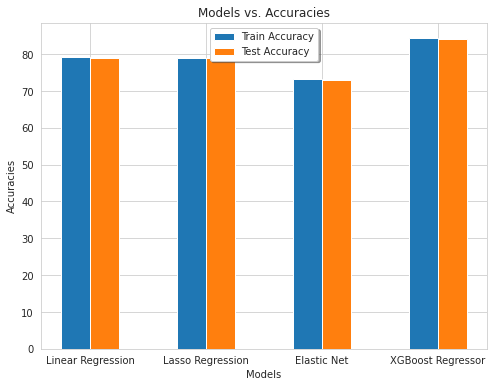

In [ ]:
# Plotting Models Vs Accuracies
md =['Linear Regression','Lasso Regression','Elastic Net','XGBoost Regressor'] 
accuracy_train = [79.11, 79.10, 73.19, 84.35]
accuracy_test = [78.98, 78.97, 72.99, 84.15]
w = 0.25
pos1 = np.arange(len(md))
pos2 = [i+w for i in pos1]
plt.figure(figsize=(8,6))
plt.bar(pos1,accuracy_train,w,label ='Train Accuracy')
plt.bar(pos2,accuracy_test,w,label ='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Models vs. Accuracies')
plt.xticks(pos1+w/2,md)
plt.legend(loc = 'best', shadow = True, fontsize = '10')
plt.show()

**Root Mean Square Error**

In [ ]:
# Importing metrics for validation
from sklearn.metrics import mean_squared_error
from math import sqrt

# Defining RMSE function
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

In [ ]:
# Root Mean Square Error
print('Root Mean Square Error:\n') 
for model, name in models.items():
  yd_predicted = model.predict(xd_train)
  yd_test_predicted = model.predict(xd_test)  
  print("Training RMSE for" + name + ":" ,rmse(yd_train, yd_predicted))
  print("Testing RMSE for" + name + ":" ,rmse(yd_test, yd_test_predicted))
  print('\n')


Root Mean Square Error:

Training RMSE for Linear Regression: 1056.631790318415
Testing RMSE for Linear Regression: 1058.9928149577179


Training RMSE for Lasso Regression: 1056.818069237203
Testing RMSE for Lasso Regression: 1059.2335882732461


Training RMSE for Elastic Net: 1196.9595914319975
Testing RMSE for Elastic Net: 1200.418921993489


Training RMSE for XG Boost Regressor: 914.4222261049048
Testing RMSE for XG Boost Regressor: 919.615851812949




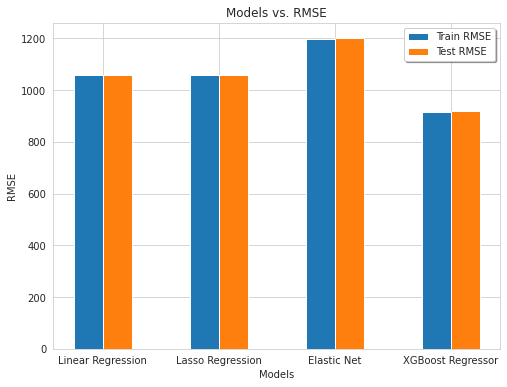

In [ ]:
# Plotting Model vs RMSE
md =['Linear Regression','Lasso Regression','Elastic Net','XGBoost Regressor']
rmse_train = [1056.63, 1056.81 ,1196.95 ,914.42]
rmse_test = [1058.99, 1059.23, 1200.42, 919.62] 
w = 0.25
pos1 = np.arange(len(md))
pos2 = [i+w for i in pos1]
plt.figure(figsize=(8,6))
plt.bar(pos1,rmse_train,w,label ='Train RMSE')
plt.bar(pos2,rmse_test,w,label ='Test RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Models vs. RMSE')
plt.xticks(pos1+w/2,md)
plt.legend(loc = 'best', shadow = True, fontsize = '10')
plt.show()

**Mean Absolute Percentage Error**

In [ ]:
# Mean Absolute Percentage Error
print('Mean Absolute Percentage  Error:\n') 
for model, name in models.items():
  yd_predicted = model.predict(xd_train)
  yd_test_predicted = model.predict(xd_test)  
  print("Training MAPE for" + name + ":" ,mape(yd_train, yd_predicted))
  print("Testing MAPE for" + name + ":" ,mape(yd_test, yd_test_predicted))
  print('\n')

Mean Absolute Percentage  Error:

Training MAPE for Linear Regression: 13.355514193161286
Testing MAPE for Linear Regression: 13.363074979430344


Training MAPE for Lasso Regression: 13.35140747649185
Testing MAPE for Lasso Regression: 13.360921642350004


Training MAPE for Elastic Net: 15.024983544238554
Testing MAPE for Elastic Net: 15.036059955251819


Training MAPE for XG Boost Regressor: 11.467678844928741
Testing MAPE for XG Boost Regressor: 11.527872830629349




<Figure size 1008x576 with 0 Axes>

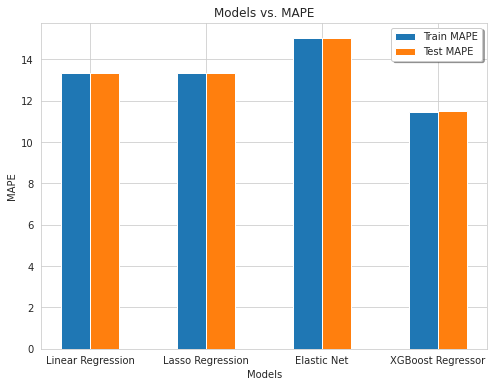

In [ ]:
# Mean Absolute Percentage Error
plt.figure(figsize=(14,8))
mape_train = [13.35,13.35,15.02,11.46]
mape_test = [13.36,13.36,15.03,11.53]
w = 0.25
pos1 = np.arange(len(md))
pos2 = [i+w for i in pos1]
plt.figure(figsize=(8,6))
plt.bar(pos1,mape_train,w,label ='Train MAPE')
plt.bar(pos2,mape_test,w,label ='Test MAPE')
plt.xlabel('Models')
plt.ylabel('MAPE')
plt.title('Models vs. MAPE')
plt.xticks(pos1+w/2,md)
plt.legend(loc = 'best', shadow = True, fontsize = '10')
plt.show()

In [ ]:
# Feature Importance
features = xd_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

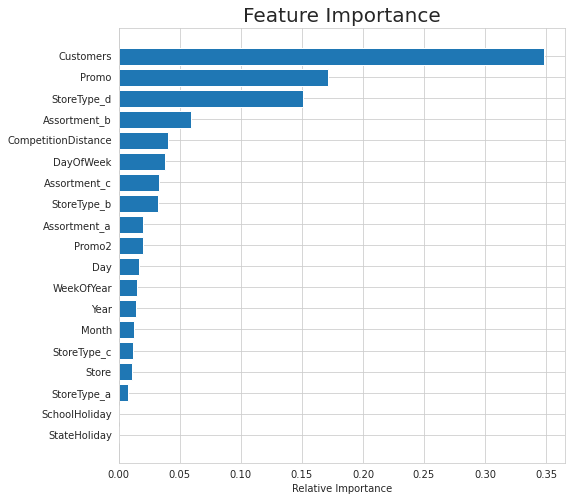

In [ ]:
# Plotting Feature Importance
plt.figure(figsize=(8,8))
plt.title('Feature Importance', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### <b><u> Step 6 : Model Selection</u></b>


*   *We have implemented 4 models, Linear, Lasso, Elastic Net and XGBoostcRegressor*

*   *Performance of Linear and Lasso Regression model is almost similar.Both model fitted well to data set but have comparatively less accuracies (78.98% and 78.97%).*

*   *Elastic Net Regressor has lowest accuracy (72.99%) among all the models.*

*   *XGBoost Regressor has highest accuracy i.e (84.35%).It has lowest 'Root Mean Square Error' and 'Mean Absolute Percentage Error'*

*   *So we will select XGBoost Regressor for Data Modelling*

### <b><u> Step 7 : Hyperparameter Tuning</u></b>

*In order to increase the accuracy and performance of our selected model,we will find optimum parameters by tuning the hyperparameters.*

In [ ]:
# Defining parameters for tuning
params = {"learning_rate":[0.15, 0.20, 0.25, 0.30],
          "max_depth":[3, 6, 9, 15],
          "min_child_weight":[1, 3, 5, 7],
          "gamma":[0.0, 0.1, 0.2, 0.3, 0.4],
          "colsample_bytree":[0.3,0.4,0.5,0.7]}

In [ ]:
# Importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
import xgboost 

In [ ]:
reg = xgboost.XGBRFRegressor()

In [ ]:
# Creating search model for optimum parameters
random_search = RandomizedSearchCV(reg,param_distributions=params,n_iter=3,n_jobs=-1,cv=3,verbose=3)

In [ ]:
# Fitting search model for optimum parameters
random_search.fit(xd_train,yd_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.6min finished


[11:22:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRFRegressor(base_score=0.5, colsample_bylevel=1,
                                            colsample_bynode=0.8,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed...ent=None,
                                            subsample=0.8, verbosity=1),
                   iid='deprecated', n_iter=3, n_jobs=-1,
                   param_di

In [ ]:
# Getting best parameters
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 5}

In [ ]:
# New model with optimum parameters
optimum_model = XGBRegressor(max_depth=3,learning_rate=0.2,gamma=0.1,min_child_weight=5,colsample_bytree=0.7)

In [ ]:
# Fitting optimum model 
optimum_model.fit(xd_train,yd_train)

[11:24:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Getting scores for XGBoost Regressor 
om_predicted = optimum_model.predict(xd_train)
om_test_predicted = optimum_model.predict(xd_test)
print('XGBoost Regressor Performance for Training Data Set\n')
print("XGBoost Regressor  Score for Training Data      : ",optimum_model.score(xd_train, yd_train)*100)
print("Training RMSE                                   : ",rmse(yd_train, om_predicted))
print("Training MAPE                                   : ",mape(yd_train, om_predicted),'\n')
print('XGBoost Regressor Performance for Testing Data Set\n')
print("XGBoost Regressor Score for Testing Data        : ",optimum_model.score(xd_test, yd_test)*100)
print("Testing RMSE                                    : ",rmse(yd_test, om_test_predicted))
print("Testing MAPE                                    : ",mape(yd_test, om_test_predicted))

XGBoost Regressor Performance for Training Data Set

XGBoost Regressor  Score for Training Data      :  86.29442278050199
Training RMSE                                   :  855.8057157244388
Training MAPE                                   :  10.597801208496094 

XGBoost Regressor Performance for Testing Data Set

XGBoost Regressor Score for Testing Data        :  86.11076399626663
Testing RMSE                                    :  860.8540760421206
Testing MAPE                                    :  10.655666887760162


*After tuning hyperparameters, accuracy of model is increased by 2%.*

### <b><u> Conclusion: </u></b>

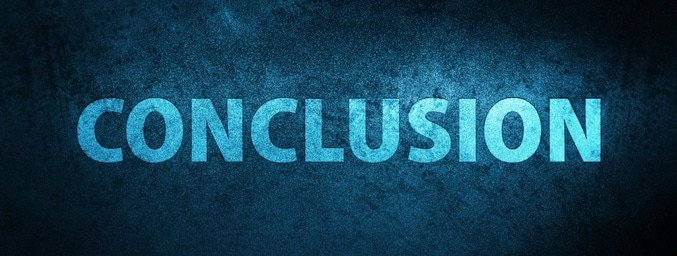

* We have implemented 4 models, Linear, Lasso, Elastic Net and XGBoostcRegressor

* Performance of Linear and Lasso Regression model is almost similar.Both model fitted well to data set but have comparatively less accuracies (78.98% and 78.97%).

* Elastic Net Regressor has lowest accuracy (72.99%) among all the models.

* XGBoost Regressor has highest accuracy i.e (84.35%).It has lowest 'Root Mean Square Error' and 'Mean Absolute Percentage Error'

* So we will select XGBoost Regressor for Data Modelling

* After tuning hyperparameters, efficiency of model is increased by 2%.

### <b><u> References: </u></b>

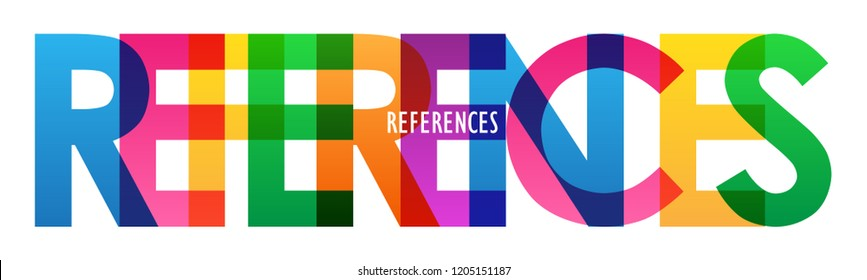


We have taken references for our project from below mentioned resources.

* AlmaBetter
* GitHub
* Kaggle
* YouTube
* StackOverFlow
* Towards data science
* Analytics vidya
* Code basics




